### CNN Model Classifying Fire & Non Fire    

In [19]:
import numpy as np
np.random.seed(1000)
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
import keras

In [20]:
os.environ['KERAS_BACKEND'] = 'tensorflow'

In [18]:
image_directory = 'Datasets/Deep_Learning(Data)/Training Set/'
SIZE = 200
dataset = [] 
label = []  

#Place holders to define add labels. We will add 0 to all No_Fire images and 1 to Fire Images.

Fire_images = os.listdir(image_directory + 'Fire/')
for i, image_name in enumerate(Fire_images):         #Enumerate method adds a counter and returns the enumerate object
    
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + 'Fire/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)

#Iterate through all images in No_Fire folder, resize to 200 X 200

No_Fire_images = os.listdir(image_directory + 'No_Fire/')
for i, image_name in enumerate(No_Fire_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + 'No_Fire/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))                        #Then save into the same numpy array 'dataset' but with label 1
        label.append(0)

In [19]:
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.models import Sequential

model = None
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape = (SIZE, SIZE, 3), activation = 'relu', data_format='channels_last'))
model.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))

model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Convolution2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))

model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(activation = 'relu', units=512))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Dense(activation = 'relu', units=256))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Dense(activation = 'sigmoid', units=2))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 99, 99, 32)        128       
_________________________________________________________________
dropout_12 (Dropout)         (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 97, 97, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 48, 48, 32)       

In [20]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(dataset, to_categorical(np.array(label)), test_size = 0.20, random_state = 0)

In [23]:
#Fit the model
history = model.fit(np.array(X_train), 
                         y_train, 
                         batch_size = 64, 
                         verbose = 1, 
                         epochs = 1,                   
                         validation_split = 0.1,
                         shuffle = False               
                     )

614/614 [==============================] - 1586s 3s/step - loss: 0.0303 - accuracy: 0.9884 - val_loss: 0.0266 - val_accuracy: 0.9918


In [24]:
print("Test_Accuracy: {:.2f}%".format(model.evaluate(np.array(X_test), np.array(y_test))[1]*100))

342/342 [==============================] - 68s 198ms/step - loss: 0.0204 - accuracy: 0.9932
Test_Accuracy: 99.32%


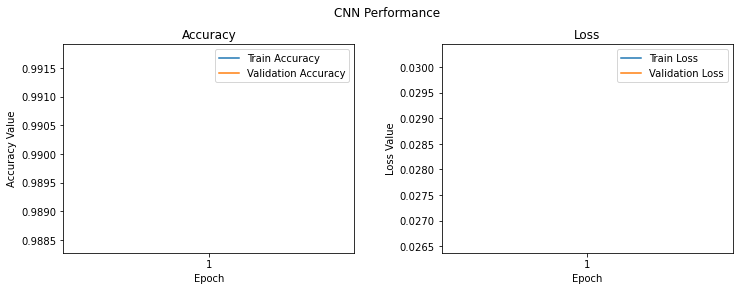

In [25]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

0 -> No Fire
1 -> Fire


The prediction for this image is:  [[1.6537309e-04 9.9894178e-01]]
The actual label for this image is:  [0. 1.]


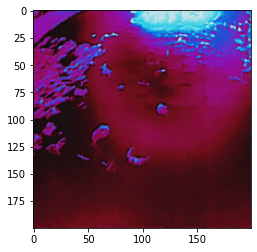

In [26]:
#Check results on a few select images
print("0 -> No Fire")
print("1 -> Fire")
print("\n")
n=11  #Select the index of image to be loaded for testing
img = X_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
prediction = model.predict(input_img)  
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", y_test[n])

In [27]:
#Save the model
model.save('Fire&NoFire_cnn.h5')

In [15]:
from tensorflow import keras
model = keras.models.load_model('Fire&NoFire_cnn.h5')

Fire Images: 1620
No Fire Images: 1437


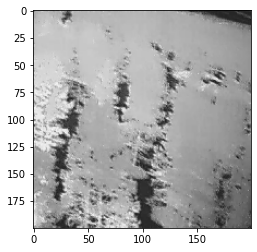

In [29]:
from keras.preprocessing import image

image_directory = 'Datasets/Deep_Learning(Data)/Testing Set/No_Fire/'
firecount=0
nofirecount=0
for i in os.listdir(image_directory):
    img = image.load_img(image_directory+'//'+i,target_size=(200,200))
    plt.imshow(img)
    img = image.img_to_array(img)
    input_img = np.expand_dims(img, axis=0)
    val = model.predict(input_img)  
    #plt.show() 
    if(val[0][0]>val[0][1]):
        #print("No Fire")
        nofirecount+=1
    else:
        #print("Fire")
        firecount+=1
print("Fire Images:",firecount)
print("No Fire Images:",nofirecount)

Fire Images: 1917
No Fire Images: 8083


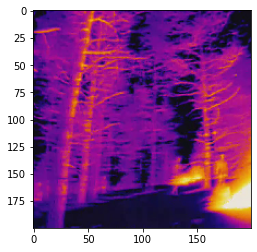

In [30]:

from keras.preprocessing import image

image_directory = 'Datasets/Deep_Learning(Data)/Testing Set/Fire/'
firecount=0
nofirecount=0
for i in os.listdir(image_directory):
    img = image.load_img(image_directory+'//'+i,target_size=(200,200))
    plt.imshow(img)
    img = image.img_to_array(img)
    input_img = np.expand_dims(img, axis=0)
    val = model.predict(input_img)  
    #plt.show() 
    if(val[0][0]>val[0][1]):
        #print("No Fire")
        nofirecount+=1
    else:
        #print("Fire")
        firecount+=1
print("Fire Images:",firecount)
print("No Fire Images:",nofirecount)